In [9]:
!pip install -r requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)


In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# read data set
data = pd.read_csv("./Student_Performance.csv")

In [14]:
# see top 5 rows
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [15]:
# see column data type and some info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [24]:
df = pd.read_csv('insurance.csv')

In [16]:
# see precentege of missing value in each column
data.isna().sum() / data.shape[0]

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [17]:
# see dimensions
data.shape

(10000, 6)

In [ ]:
[1 ,2 , np.nan , 5 ,7 ]

In [25]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

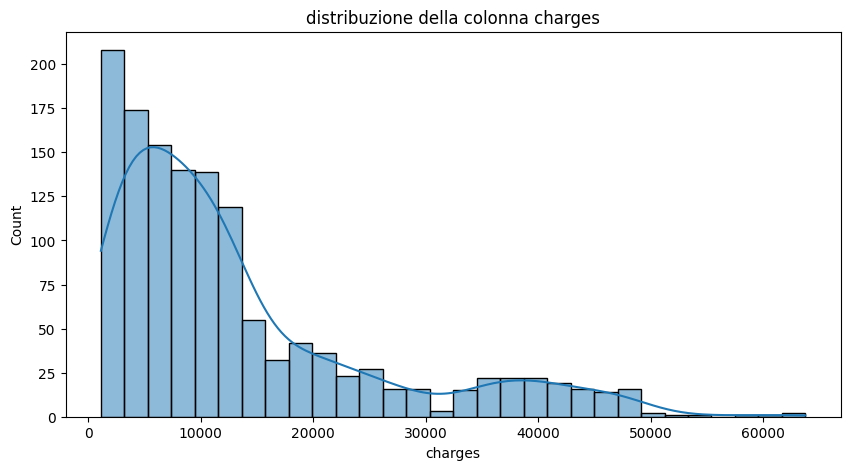

In [33]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax = sns.histplot(df['charges'], kde= True)
plt.title("distribuzione della colonna charges")
plt.show()

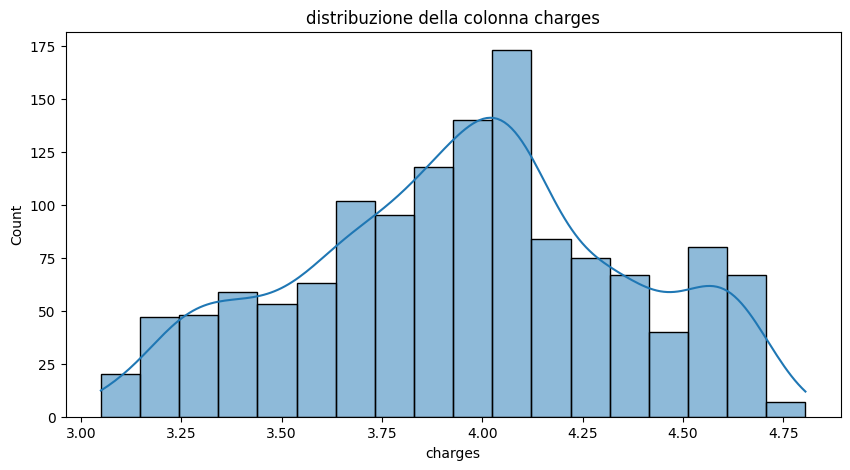

In [34]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax = sns.histplot(np.log10(df['charges']), kde= True)
plt.title("distribuzione della colonna charges")
plt.show()

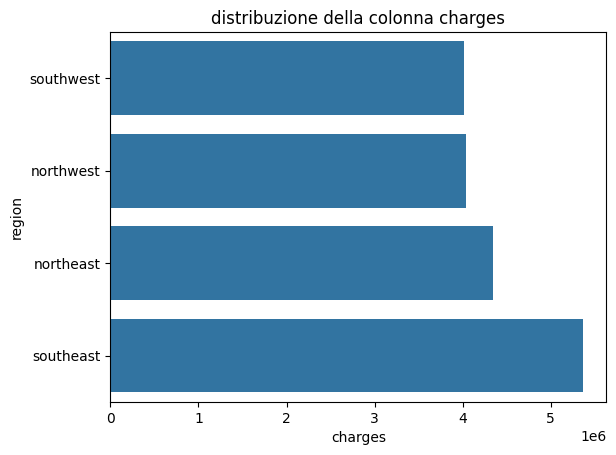

In [35]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
ax = sns.barplot(x=charges.head(), y= charges.head().index)
plt.title("distribuzione della colonna charges")
plt.show()

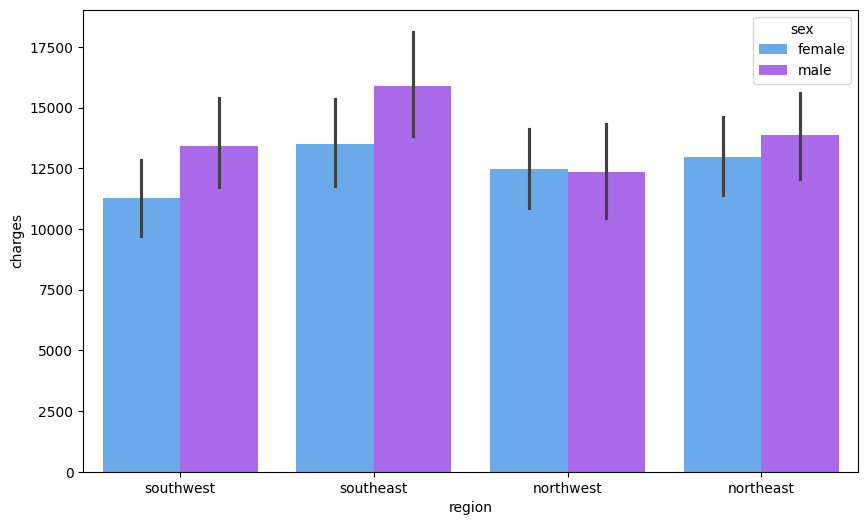

In [39]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
ax = sns.barplot(x='region', y= 'charges', hue= 'sex', data= df, palette='cool')



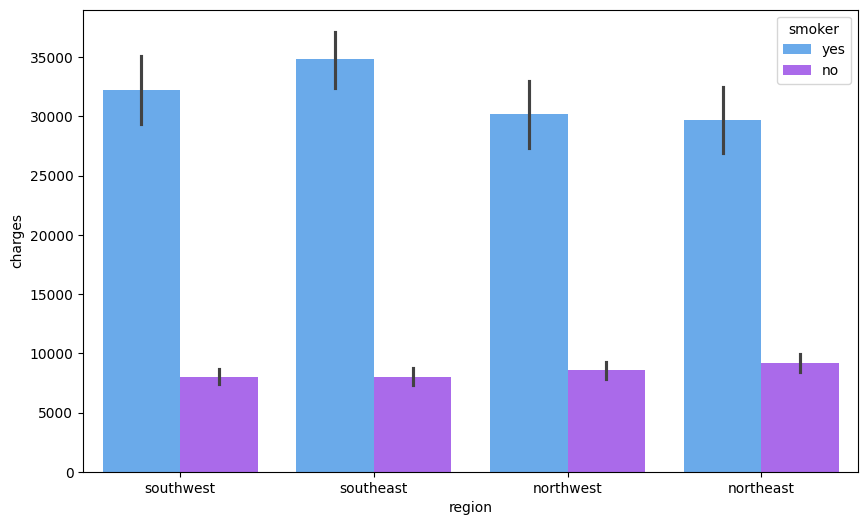

In [40]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
ax = sns.barplot(x='region', y= 'charges', hue= 'smoker', data= df, palette='cool')

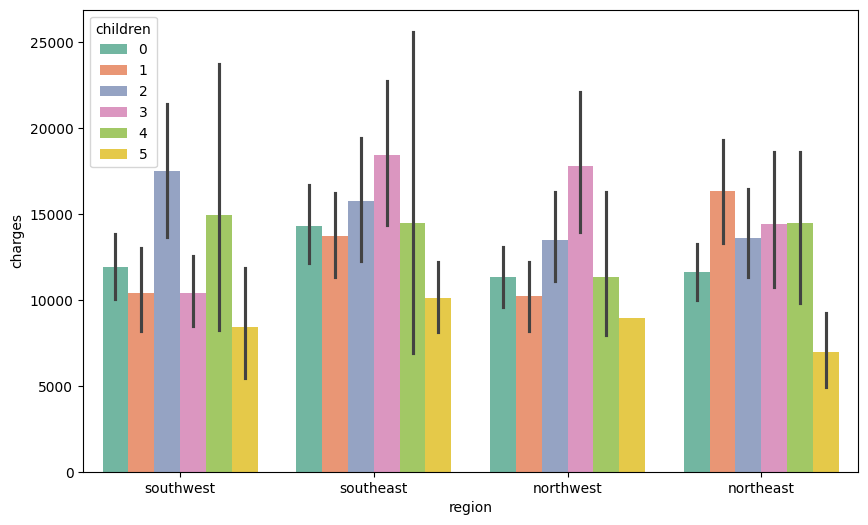

In [43]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
ax = sns.barplot(x='region', y= 'charges', hue= 'children', data= df, palette='Set2')

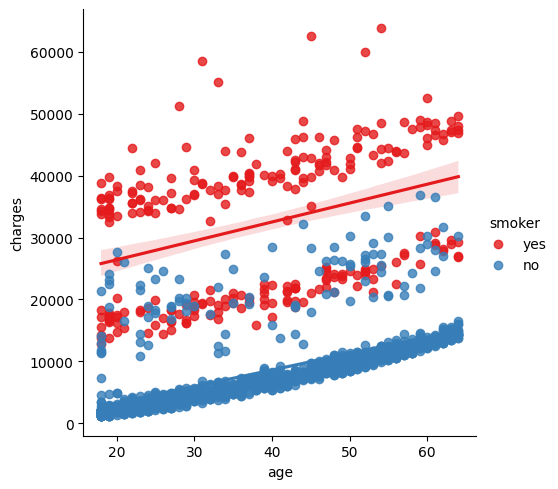

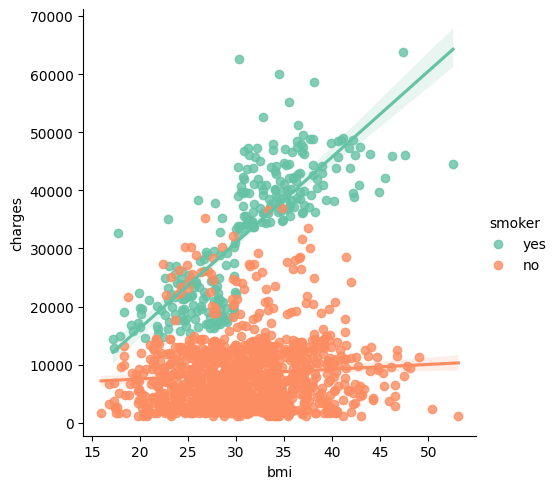

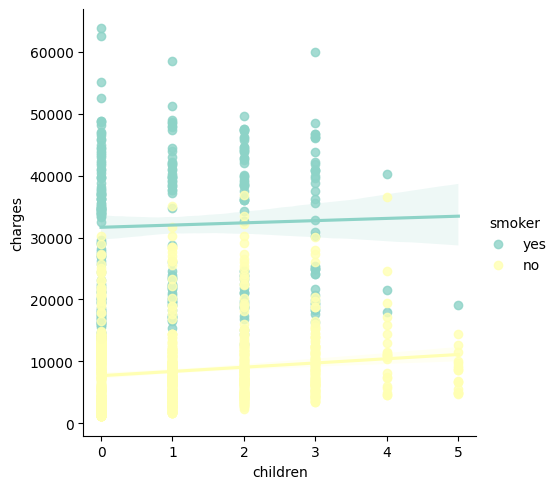

In [52]:
ax= sns.lmplot(x='age', y= 'charges', hue= 'smoker', data= df, palette='Set1')
ax= sns.lmplot(x='bmi', y= 'charges', hue= 'smoker', data= df, palette='Set2')
ax= sns.lmplot(x='children', y= 'charges', hue= 'smoker', data= df, palette='Set3')

In [53]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [56]:
df[['sex', 'smoker','region']] = df[['sex', 'smoker','region']].astype('category')

In [57]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [59]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [60]:
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)


In [61]:
df.sex.head()

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [64]:
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)


In [ ]:
df.smoker.head()


0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

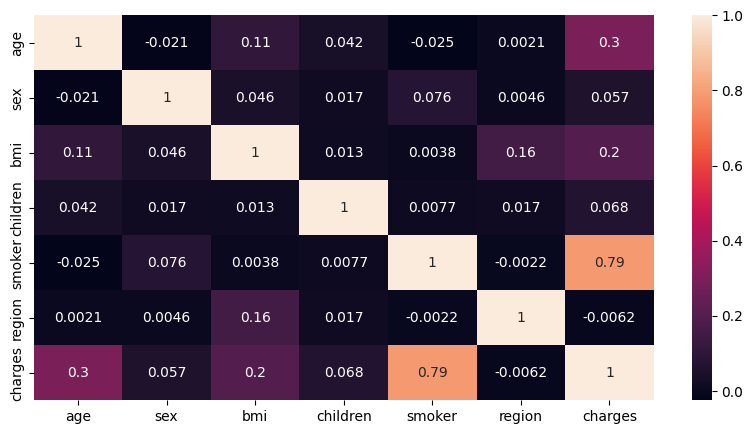

In [67]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
ax = sns.heatmap(df.corr(),annot=True)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis=1)
y= df['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)


In [69]:
#model 1
model_linear_reg = LinearRegression()
model_linear_reg.fit(x_train,y_train)

LinearRegression()

In [74]:
from sklearn.linear_model import Ridge
model_ridge = Ridge (alpha=0.5)
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [76]:
print("Acc train set: ", model_ridge.score(x_train, y_train))
print("Acc test set: ", model_ridge.score(x_test, y_test))

Acc train set:  0.7368254217014263
Acc test set:  0.7996989632063138


In [79]:
#model 4
from sklearn.ensemble import RandomForestRegressor as rfr
model_rfr= rfr(n_estimators=100,criterion='absolute_error',random_state=1,n_jobs=-1)
model_rfr.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_jobs=-1, random_state=1)

In [80]:
print("Acc train set: ", model_rfr.score(x_train, y_train))
print("Acc test set: ", model_rfr.score(x_test, y_test))

Acc train set:  0.9725381639435583
Acc test set:  0.8768985593410856


features importance ranking

1.age(0.338733)
2.smoker(0.319098)
3.bmi(0.254988)
4.children(0.041093)
5.region(0.032772)
6.sex(0.013316)


<BarContainer object of 6 artists>

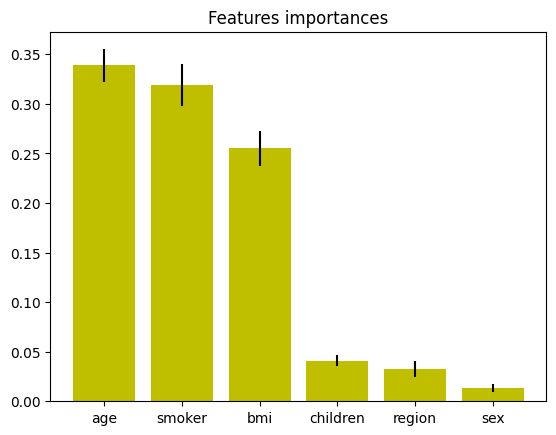

In [85]:
print('features importance ranking\n')
importances = model_rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rfr.estimators_], axis= 0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi','children','smoker','region']
importances_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importances_list.append(variable)
    print("%d.%s(%f)" % (f+1,variable, importances[indices[f]]))
plt.figure()
plt.title('Features importances')
plt.bar(importances_list,importances[indices],color='y', yerr= std[indices], align='center')